In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.metrics import recall_score,precision_score,precision_recall_curve
from operator import itemgetter
import matplotlib.pyplot as mt

In [2]:
filename='IR-assignment-3-data.txt'
f=open(filename,'r+')
data=f.readlines()

In [3]:
qid_4=[]
extracted=[]
for i in data:
    t=i.split(' ')
    if(t[1]=='qid:4'):
        qid_4.append(t)

for i in range(len(qid_4)):
    qid_4[i].remove('\n')

In [4]:
extracted=[] # index=0--> label, index:1->qid, index: [2-76]--> features, index:76-->tf-idf value , index:[77-136]--> some other
            # total 138 indices;; discard from index:77-138
for i in qid_4:
    temp=[]
    label=int(i[0])
    if(label==0):
        temp.append(label)
    else:
        temp.append(1)
        
    temp.append(int(i[1].split(':')[1]))
    for j in range(2,77):
        temp.append(float(i[j].split(':')[1]))
    extracted.append(temp)


In [5]:
extracted_sorted=sorted(extracted, key=itemgetter(76),reverse=True)

extracted_sorted_np=np.array(extracted_sorted)

X, y=extracted_sorted_np[:,2:], extracted_sorted_np[:,0]

In [6]:
def getPrecision(tp,fp,fn,tn):
    return tp/(tp+fp)

def getRecall(tp,fp,fn,tn):
    return tp/(tp+fn)

def params(y_truth,y_pred):
    tp,fp,fn,tn=0,0,0,0
    for i in range(len(y_pred)):
        if(int(y_truth[i])==1 and y_pred[i]==1):
            tp+=1
        elif (int(y_truth[i])==0 and y_pred[i]==0):
            tn+=1
        elif(int(y_truth[i])==0 and y_pred[i]==1):
            fp+=1
        else:
            fn+=1
    return tp,fp,fn,tn

In [7]:
precision_pts, recall_pts=[], []

for i in range(len(y)):
    y_p=[]
    for j in range(0,i+1):
        y_p.append(1)
    for j in range(i+1,len(y)):
        y_p.append(0)
    tp,fp,fn,tn=params(y,y_p)
    prec=getPrecision(tp,fp,fn,tn)
    rec=getRecall(tp,fp,fn,tn)
    print(prec,rec)
    precision_pts.append(prec)
    recall_pts.append(rec)

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.2 0.022727272727272728
0.16666666666666666 0.022727272727272728
0.2857142857142857 0.045454545454545456
0.375 0.06818181818181818
0.3333333333333333 0.06818181818181818
0.4 0.09090909090909091
0.36363636363636365 0.09090909090909091
0.4166666666666667 0.11363636363636363
0.46153846153846156 0.13636363636363635
0.5 0.1590909090909091
0.5333333333333333 0.18181818181818182
0.5625 0.20454545454545456
0.5294117647058824 0.20454545454545456
0.5555555555555556 0.22727272727272727
0.5263157894736842 0.22727272727272727
0.55 0.25
0.5238095238095238 0.25
0.5454545454545454 0.2727272727272727
0.5217391304347826 0.2727272727272727
0.5416666666666666 0.29545454545454547
0.56 0.3181818181818182
0.5769230769230769 0.3409090909090909
0.5555555555555556 0.3409090909090909
0.5357142857142857 0.3409090909090909
0.5172413793103449 0.3409090909090909
0.5 0.3409090909090909
0.4838709677419355 0.3409090909090909
0.5 0.36363636363636365
0.48484848484848486 0.3636363636363636

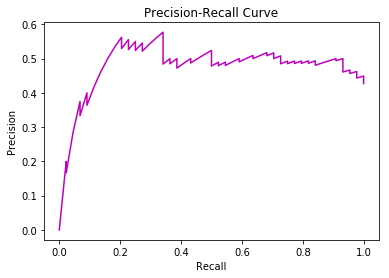

In [8]:
mt.plot(recall_pts,precision_pts,color='m')
mt.title('Precision-Recall Curve')
mt.xlabel('Recall')
mt.ylabel('Precision')
mt.show()

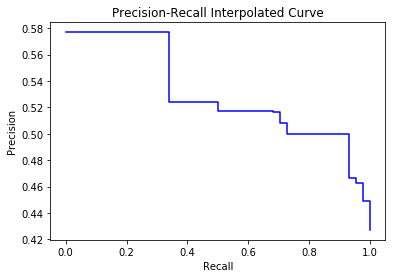

In [9]:
prec_inter, rec_inter=[], []
for i in range(len(precision_pts)):
    rec_inter.append(recall_pts[i])
    prec_inter.append(max(precision_pts[i:]))

mt.plot(rec_inter,prec_inter,color='b')
mt.title('Precision-Recall Interpolated Curve')
mt.xlabel('Recall')
mt.ylabel('Precision')
mt.show()

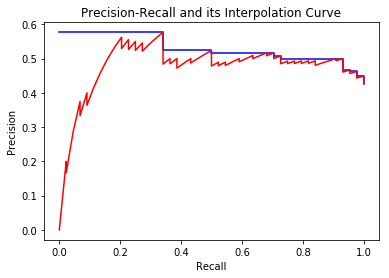

In [10]:
mt.plot(rec_inter,prec_inter,color='b')
mt.plot(recall_pts,precision_pts,color='r')
mt.title('Precision-Recall and its Interpolation Curve')
mt.xlabel('Recall')
mt.ylabel('Precision')
mt.show()